In [1]:
%load_ext nb_black
%load_ext lab_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<IPython.core.display.Javascript object>

In [3]:
dataset = pd.read_csv(
    "TSLA.csv",
    na_values=["null"],
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True,
)

<IPython.core.display.Javascript object>

In [4]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Date'>

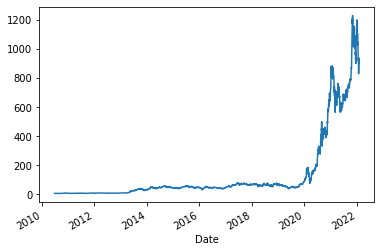

<IPython.core.display.Javascript object>

In [5]:
dataset["Adj Close"].plot()

In [6]:
Y = pd.DataFrame(dataset["Adj Close"])
X = pd.DataFrame(dataset[["Open", "High", "Low", "Close", "Volume"]])

<IPython.core.display.Javascript object>

In [7]:
Y

,Adj Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-01-27,829.099976
2022-01-28,846.349976
2022-01-31,936.719971


<IPython.core.display.Javascript object>

In [9]:
import statsmodels.api as sm

d:\Machine Learning\My Code\machine-learning\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


<IPython.core.display.Javascript object>

In [10]:
X = np.append(arr=np.ones((len(X), 1)).astype(int), values=X, axis=1)

<IPython.core.display.Javascript object>

In [13]:
X_opt = X[:, [0, 1, 2, 3, 4, 5]]

<IPython.core.display.Javascript object>

In [14]:
X_opt

array([[1.00000000e+00, 3.80000000e+00, 5.00000000e+00, 3.50800000e+00,
        4.77800000e+00, 9.38315000e+07],
       [1.00000000e+00, 5.15800000e+00, 6.08400000e+00, 4.66000000e+00,
        4.76600000e+00, 8.59355000e+07],
       [1.00000000e+00, 5.00000000e+00, 5.18400000e+00, 4.05400000e+00,
        4.39200000e+00, 4.10940000e+07],
       ...,
       [1.00000000e+00, 8.72710022e+02, 9.37989990e+02, 8.62049988e+02,
        9.36719971e+02, 3.48120000e+07],
       [1.00000000e+00, 9.35210022e+02, 9.43700012e+02, 9.05000000e+02,
        9.31250000e+02, 2.43794000e+07],
       [1.00000000e+00, 9.28179993e+02, 9.31499878e+02, 8.89469971e+02,
        9.05659973e+02, 2.20576660e+07]])

<IPython.core.display.Javascript object>

In [22]:
regressor = sm.OLS(endog=Y, exog=X_opt).fit()

<IPython.core.display.Javascript object>

In [23]:
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.805e+25
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:24:34   Log-Likelihood:                 56147.
No. Observations:                2921   AIC:                        -1.123e+05
Df Residuals:                    2915   BIC:                        -1.122e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.316e-13   3.23e-11     -0.004      0.997   -6.34e-11    6.31e-11
x1          1.221e-14   5.56e-12      0.002      0.998   -1.09e-11    1.09e-11
x2         -1.259e-14   6.41e-12     -0.002      0.998   -1.26e-11    1.26e-11
x3         -1.812e-15   5.29e-12     -0.000      1.000   -1.04e-11    1.04e-11
x4             1.0000   5.33e-12   1.88e+11      0.000       1.000       1.000
x5         -2.576e-17   7.52e-19    -34.245      0.000   -2.72e-17   -2.43e-17
==============================================================================
Omnibus:                     1509.168   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12881.498
Skew:                           2.303   Prob(JB):                         0.00
Kurtosis:                      12.199   Cond. No.                     6.77e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

In [25]:
X_opt = X[:, [0, 1, 2, 4, 5]]
regressor = sm.OLS(endog=Y, exog=X_opt).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.159e+26
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:26:10   Log-Likelihood:                 59357.
No. Observations:                2921   AIC:                        -1.187e+05
Df Residuals:                    2916   BIC:                        -1.187e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.636e-13   1.07e-11     -0.015      0.988   -2.11e-11    2.08e-11
x1           3.76e-14   1.34e-12      0.028      0.978   -2.58e-12    2.66e-12
x2         -3.585e-14   1.94e-12     -0.019      0.985   -3.83e-12    3.76e-12
x3             1.0000   1.15e-12   8.73e+11      0.000       1.000       1.000
x4         -8.588e-18   2.48e-19    -34.664      0.000   -9.07e-18    -8.1e-18
==============================================================================
Omnibus:                     1510.914   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12915.979
Skew:                           2.306   Prob(JB):                         0.00
Kurtosis:                      12.212   Cond. No.                     6.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

In [26]:
X_opt = X[:, [1, 2, 4, 5]]
regressor = sm.OLS(endog=Y, exog=X_opt).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Adj Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.957e+22
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:27:13   Log-Likelihood:                          44825.
No. Observations:                2921   AIC:                                 -8.964e+04
Df Residuals:                    2917   BIC:                                 -8.962e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.058e-16    1.9e-10   4.23e-06      1.000   -3.73e-10    3.73e-10
x2          2.571e-15   2.75e-10   9.36e-06      1.000   -5.39e-10    5.39e-10
x3             1.0000   1.64e-10    6.1e+09      0.000       1.000       1.000
x4         -1.243e-15   2.57e-17    -48.402      0.000   -1.29e-15   -1.19e-15
==============================================================================
Omnibus:                     1509.498   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12887.750
Skew:                           2.303   Prob(JB):                         0.00
Kurtosis:                      12.202   Cond. No.                     1.48e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

In [27]:
X_opt = X[:, [1, 4, 5]]
regressor = sm.OLS(endog=Y, exog=X_opt).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Adj Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.350e+22
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:27:31   Log-Likelihood:                          45873.
No. Observations:                2921   AIC:                                 -9.174e+04
Df Residuals:                    2918   BIC:                                 -9.172e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.859e-11   7.52e-11      0.247      0.805   -1.29e-10    1.66e-10
x2             1.0000   7.52e-11   1.33e+10      0.000       1.000       1.000
x3         -9.169e-16   1.77e-17    -51.842      0.000   -9.52e-16   -8.82e-16
==============================================================================
Omnibus:                     1507.307   Durbin-Watson:                   0.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12600.070
Skew:                           2.308   Prob(JB):                         0.00
Kurtosis:                      12.068   Cond. No.                     6.62e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

In [28]:
X_opt = X[:, [4, 5]]
regressor = sm.OLS(endog=Y, exog=X_opt).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Adj Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.434e+34
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:31:56   Log-Likelihood:                          84486.
No. Observations:                2921   AIC:                                 -1.690e+05
Df Residuals:                    2919   BIC:                                 -1.690e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   4.99e-18      2e+17      0.000       1.000       1.000
x2          1.244e-21   3.21e-23     38.730      0.000    1.18e-21    1.31e-21
==============================================================================
Omnibus:                     1069.625   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4882.321
Skew:                           1.719   Prob(JB):                         0.00
Kurtosis:                       8.320   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

In [29]:
Y_pred = regressor.predict(X_opt)

<IPython.core.display.Javascript object>

In [30]:
Y_pred

array([  4.778   ,   4.766   ,   4.392   , ..., 936.719971, 931.25    ,
       905.659973])

<IPython.core.display.Javascript object>

In [31]:
Y

,Adj Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-01-27,829.099976
2022-01-28,846.349976
2022-01-31,936.719971


<IPython.core.display.Javascript object>

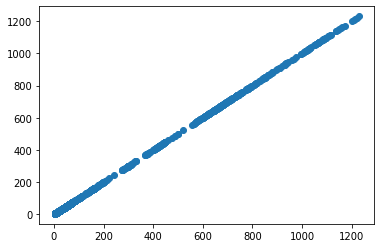

<IPython.core.display.Javascript object>

In [32]:
plt.scatter(Y, Y_pred)